In [ ]:
import pandas as pd

# Load dataset
Flight_data = pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv")

Flight_data["MonthName"] = pd.to_datetime(
    Flight_data["Month"], format="%m"
).dt.month_name()


In [29]:
Flight_data[["Month", "MonthName"]].head()


,Month,MonthName
0,9.0,September
1,9.0,September
2,8.0,August
3,2.0,February
4,8.0,August


## 3.1  Monthly cancellation by Weather  Delay 


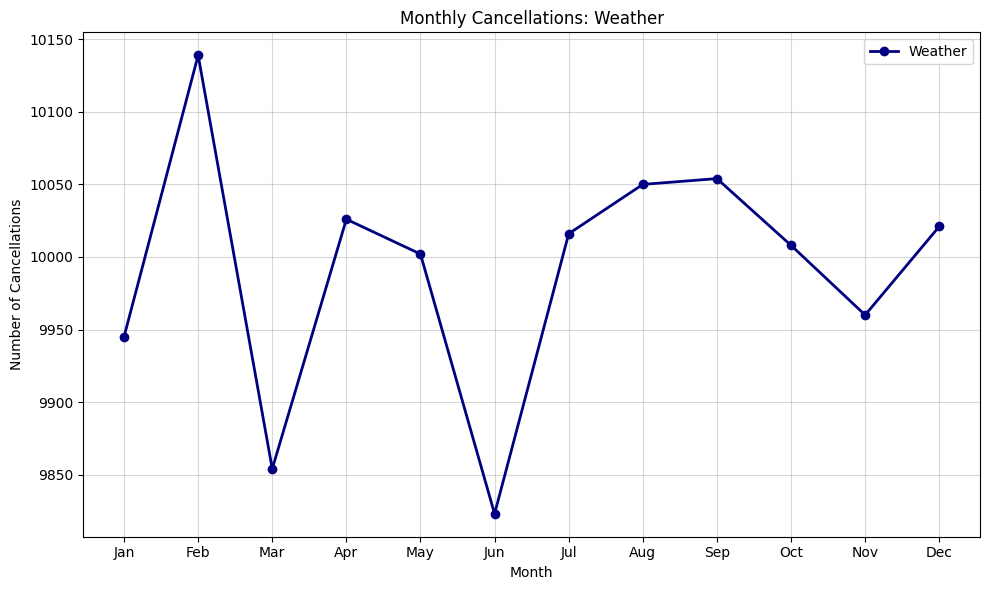

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(
    r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv"
)

# Clean column names
df.columns = df.columns.str.strip()

cancelled_df = df[df['Cancellation'] == 1]

weather_monthly = (
    cancelled_df[cancelled_df['WeatherDelay'] != 1]
    .groupby('Month')
    .size()
)

months = range(1, 13)
weather_monthly = weather_monthly.reindex(months, fill_value=0)

month_labels = ['Jan','Feb','Mar','Apr','May','Jun',
                'Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(10, 6))

plt.plot(
    months,
    weather_monthly,
    color='navy',
    marker='o',
    linewidth=2,
    label='Weather'
)


plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.title("Monthly Cancellations: Weather")
plt.xticks(months, month_labels)
plt.grid(True, alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()


## Highest cancellations in Feb 


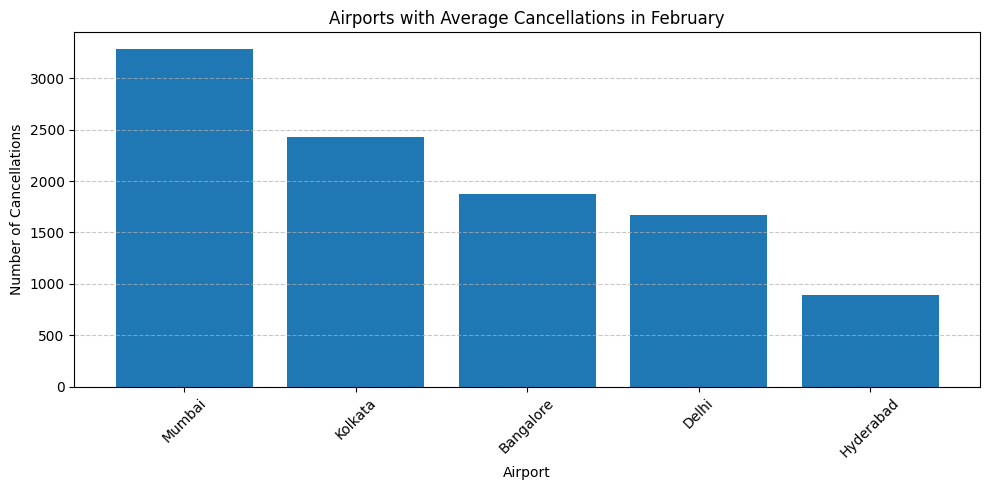

In [6]:
df.columns = df.columns.str.strip()

feb_cancel = df[(df['Month'] == 2) &(df['Cancellation'] == 1)]
airport_cancel = (feb_cancel.groupby('source_city').size().sort_values(ascending=False))

top_airports = airport_cancel.head(6)

plt.figure(figsize=(10, 5))
plt.bar(top_airports.index, top_airports.values)

plt.xlabel("Airport")
plt.ylabel("Number of Cancellations")
plt.title("Airports with Average Cancellations in February")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Reasons 
   * Mumbai’s late winter often brings dense fog and low visibility in the Winter Seasons, especially around coastal areas, which disrupts take‑offs and landings.
   
   * he Arabian Sea can create thunderclouds and strong winds, forcing air‑traffic control to slow or stop operations for safety.


## 3.2 Monthly cancellation by Carrier Delay 

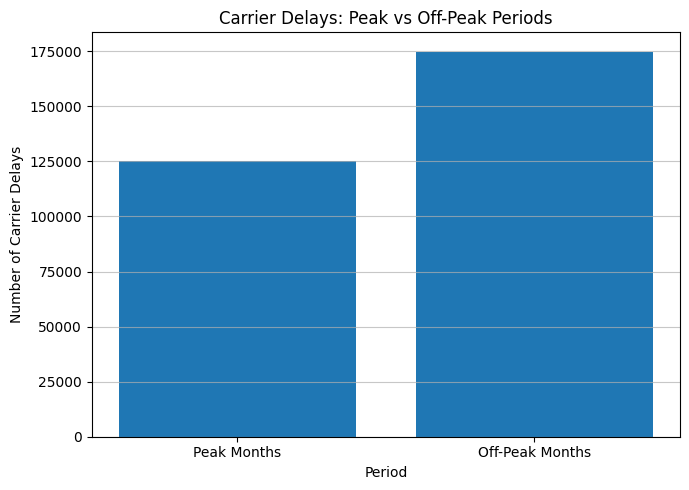

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(
    r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv"
)

# Clean column names
df.columns = df.columns.str.strip()

# Define peak and off-peak months
peak_months = [4, 5, 8, 10, 9]      # Summer + holiday season
off_peak_months = [1, 2, 3, 6, 7, 11, 12]  # Rest of the year

# Filter carrier delays
carrier_delays = df[df['CarrierDelay'] != 0]
  
peak_delays = carrier_delays[carrier_delays['Month'].isin(peak_months)].shape[0]
off_peak_delays = carrier_delays[carrier_delays['Month'].isin(off_peak_months)].shape[0]

# Plot
plt.figure(figsize=(7, 5))

plt.bar(
    ['Peak Months', 'Off-Peak Months'],
    [peak_delays, off_peak_delays]
)

plt.xlabel("Period")
plt.ylabel("Number of Carrier Delays")
plt.title("Carrier Delays: Peak vs Off-Peak Periods")
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


## Reasons 
* During off-peak months, flight volume is lower, so airlines face less congestion and fewer external constraints. In theory, this should reduce delays.

  - These cost-saving measures reduce operational buffers. When even small disruptions occur, airlines lack flexibility, leading to higher carrier-induced delays.

* Even though flight traffic is higher during peak months, airlines are better prepared with adequate crew and aircraft availability, resulting in fewer carrier delays compared to off-peak periods.

## 3.3 Cancellation Rates by Seasons

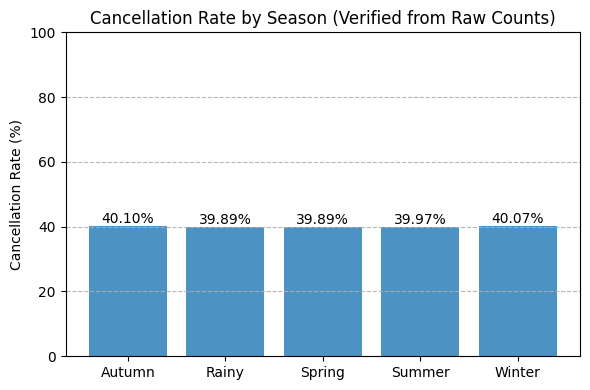

In [11]:
import matplotlib.pyplot as plt

# Define season_summary by calculating cancellation rates by season
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Summer', 5: 'Summer',
                  6: 'Rainy', 7: 'Rainy', 8: 'Rainy',
                  9: 'Rainy', 10: 'Autumn', 11: 'Winter'}

df['Season'] = df['Month'].map(season_mapping)

season_summary = df.groupby('Season').agg(
    Total_Flights=('Cancellation', 'count'),
    Cancelled_Flights=('Cancellation', 'sum')
).reset_index()

season_summary['Cancellation_Rate_%'] = (
    (season_summary['Cancelled_Flights'] / season_summary['Total_Flights']) * 100
)
season_summary = season_summary.set_index('Season')

plt.figure(figsize=(6, 4))

plt.bar(
    season_summary.index,
    season_summary['Cancellation_Rate_%'],
    alpha=0.8
)

plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Season (Verified from Raw Counts)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.9)

# Add exact values on bars (this is important for proof)
for i, value in enumerate(season_summary['Cancellation_Rate_%']):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center')

plt.tight_layout()
plt.show()



# Summary of Week 6 Analysis Results

* Flight cancellations and delays show clear seasonal patterns, with different factors dominating at different times of the year.

* Weather-related disruptions peak during winter months, confirming the strong influence of seasonal weather on flight operations.

* The carrier vs NAS delay analysis shows that airline operational issues contribute significantly to delays, even when weather conditions are not severe.

* Carrier delays are higher during off-peak months, indicating that lower demand does not necessarily lead to better operational performance.

* Increased off-peak carrier delays suggest reduced staffing, cost-cutting strategies, and limited operational buffers affect airline efficiency.

* Overall, while weather acts as a major external cause of disruptions, internal airline management and planning play a crucial role in determining delay performance throughout the year.